In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

# Decision Tree plotting
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  

import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('/Users/RyanMburu/Documents/Supervised-Learning/Decision Trees/Decision Tree Classifier/Abseenteeism/Absenteeism_at_work.xlsx', index_col='ID')
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0


In [3]:
df.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [16]:
# Assuming its clean and EDA is performed, lets do the decision tree algo on it

# Will use all factors except seasons
X = df[['Reason for absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']].values
y = df['Month of absence'].values

classes = df['Month of absence'].unique()
features = ['Reason for absence', 'Day of the week', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
X

classes


array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0])

In [5]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# before min sample split
tree = DecisionTreeClassifier(max_depth=5)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [7]:
# Test accuracy
print('Accuracy is : ', metrics.accuracy_score(y_test, y_pred))

Accuracy is :  0.7094594594594594


In [18]:
# Test accuracy after minimum sample split

tree_min = DecisionTreeClassifier(max_depth=5, min_samples_split=20)

tree_min.fit(X_train, y_train)

y_pred_min = tree_min.predict(X_test)

print('Accuracy is : ', metrics.accuracy_score(y_test, y_pred_min))

Accuracy is :  0.7094594594594594


In [19]:
df_dt = pd.DataFrame({'OG' : y_test, 'predictions' : y_pred})
df_dt

,OG,predictions
0,4,4
1,4,4
2,7,7
3,8,8
4,5,5
...,...,...
143,5,5
144,10,10
145,10,10
146,7,2


Its observed that as the size of depth and the size of minimum splits increases, the accuracy of the model increases. 

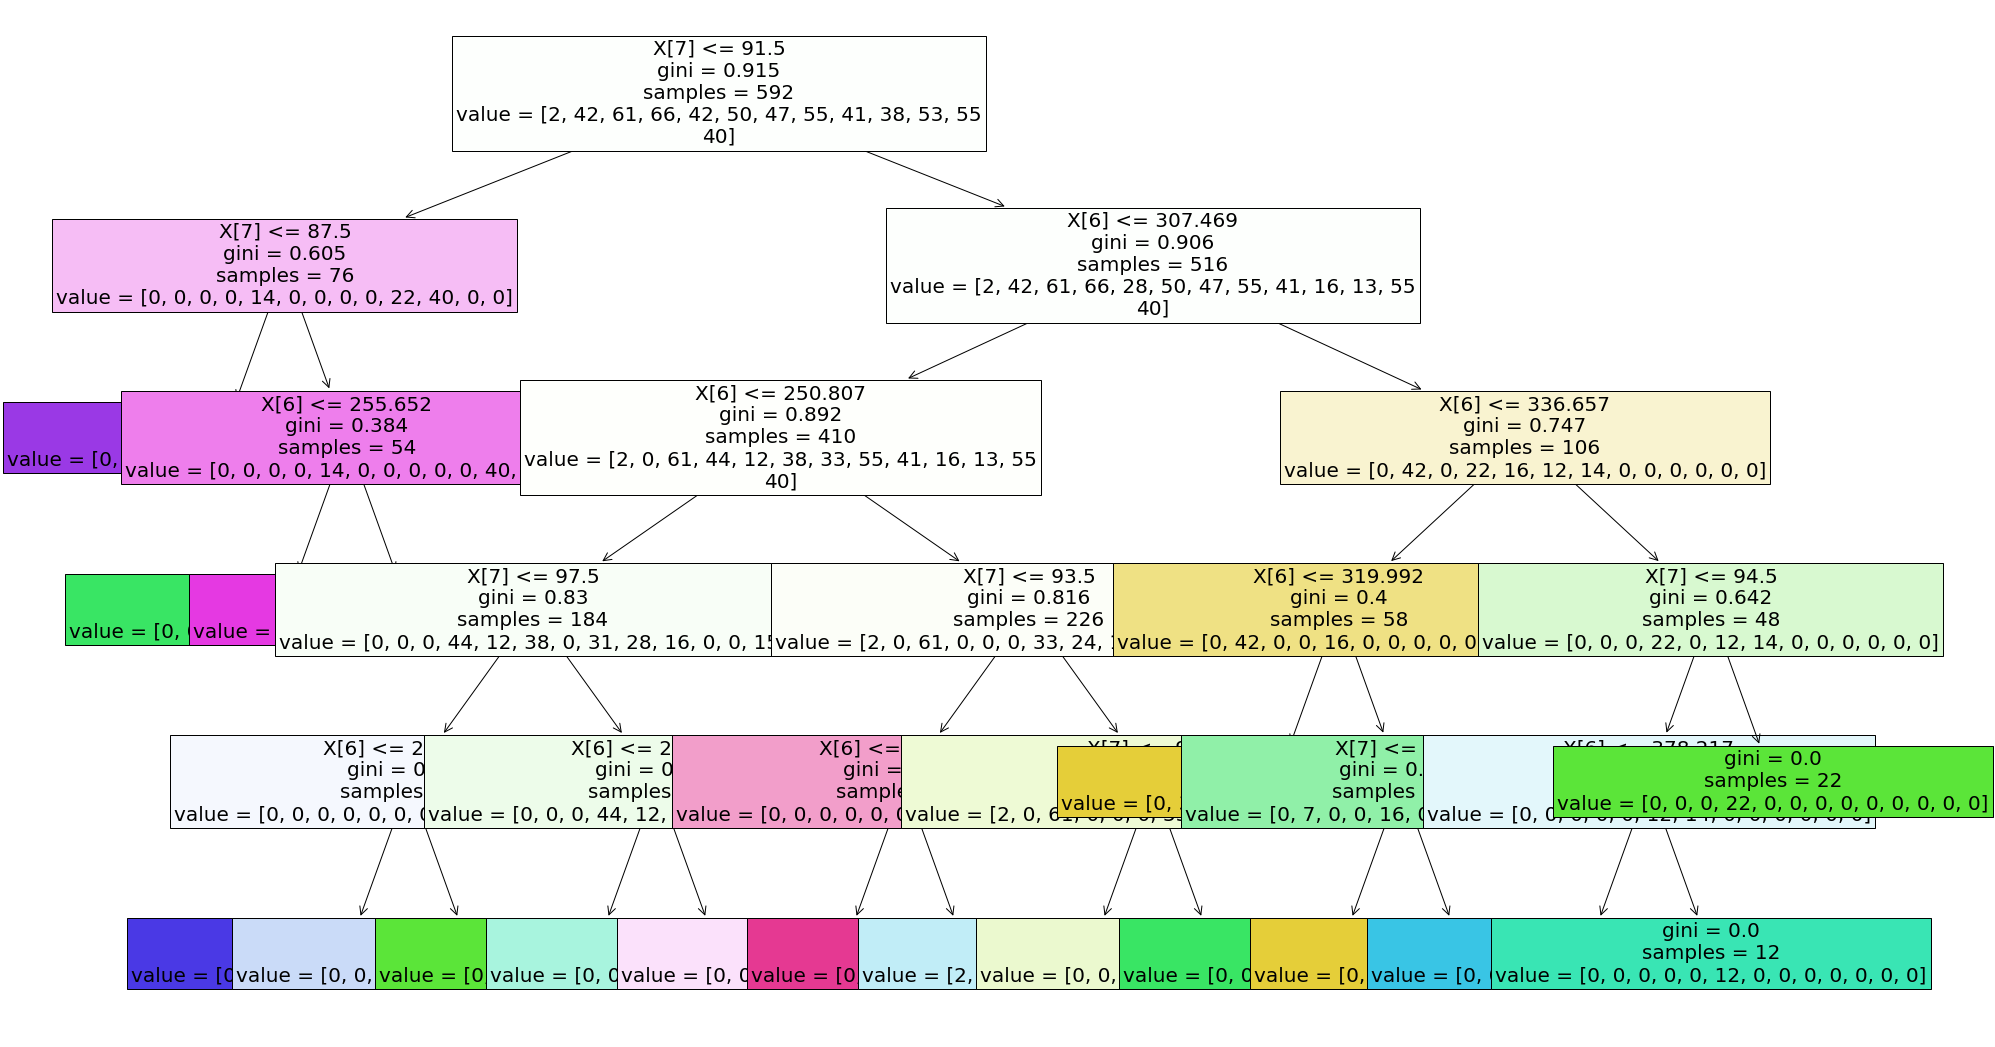

In [20]:
# Plotting the decision tree
fig, ax = plt.subplots(figsize=(30,19))
tree.plot_tree(tree_min, fontsize=20, filled=True)
plt.show()